# Gerando Expressões Interação-Transformação com Perceptron de Múltiplas Camadas


Maira Zabuscha de Lima

Orientador: Prof. Dr. Fabrício Olivetti de França

## Introdução

A **regressão** é uma técnica estatística que determina a relação entre variáveis através de uma função que aproxima dados obtidos experimentalmente, chamada de modelo. Para tanto, é necessário definir uma função, por exemplo $f(x) = y = ax +b$, a priori e, então, otimizar os parâmetros, nesse exemplo $a$ e $b$, para melhor acomodar os dados, $x$ e $y$.

Uma **rede neural de múltiplas camadas** tem a vantagem de ser um aproximador universal, ou seja, ela é capaz de aproximar qualquer função $f$ com um pequeno erro $\epsilon$, dados os parâmetros corretos. Porém, a função fornecida por essa técnica pode ser composta pela soma de uma grande quantidade de funções não relacionadas, não sendo possível sua interpretação semântica pelo pesquisador. Por esse motivo, essa técnica é chamada de caixa preta.

Quando se tem interesse em um modelo com capacidade de interpretação semântica, utiliza-se a técnica da **regressão simbólica**, que fornece um modelo simples e, ainda assim, de erro mínimo. A regressão simbólica otimiza não apenas os parâmetros, mas também as funções usadas pelo modelo, com os objetivos de minimizar o erro de aproximação e maximizar a simplicidade da expressão.


## Justificativa

Um modelo de regressão simbólica que produz soluções simples, mesmo que com precisão menor que os modelos caixas pretas, pode ser desejável em diversas situações nas quais o objetivo é compreender o sistema, por exemplo fenômenos físicos, ou quando explicar o modelo é necessário para extrair conhecimento do sistema, e, até mesmo, para validar o modelo, como nos seguintes exemplos:

- um modelo que automatiza as decisões de um juiz: não pode ter viés;
- modelo que toma as decisões de um sistema de inteligência artificial que conduz um veículo de passageiros autonomamente;
- muitas empresas online que usam algoritmos para otimizar as ofertas que fazem aos usuários, como a Netflix, a Amazon.

## Representação Interação-Transformação

Dado um conjunto de dados representado por uma matriz $X_{(r \times d)}$, e um vetor de variáveis alvo $y$, a representação Interação-Transformação (IT) foi definida como as funções representáveis pela forma:
\begin{equation}
\hat{y} = \sum_i w_i \cdot g_i(\mathbf{x}),
\label{eq:it}
\end{equation}
onde $w_i$ são coeficientes de uma regressão linear dos componentes $g_i(.)$ que são funções compostas $g(.) = t(.) \circ p(.)$, com $t : \mathbb{R} \rightarrow \mathbb{R}$ uma função de transformação, e $p : \mathbb{R}^d \rightarrow \mathbb{R}$ uma função de interação da forma:
\begin{equation}
p(\mathbf{x}) = \prod_{i=1}^d x_i^{e_i},
\end{equation}
onde $e_i \in \mathbb{Z}$ são expoentes inteiros, denominados força da interação.

## Exemplo

Para exemplificar a estrutura IT, considere a função:
\begin{equation}
f(\mathbf{x}) = 3.5 \cos{(x_1^2 x_2)} + 5 \sqrt{\frac{x_2^3}{x_1}},
\end{equation}
que pode ser descrita como
\begin{equation}
\mathbf{t}(z) = [\cos{z}, \sqrt{z}]
\end{equation}
\begin{equation}
\mathbf{p}(\mathbf{x}) = [x_1^2 x_2, x_1^{-1} x_2^3]
\end{equation}
\begin{equation}
\mathbf{w} = [3.5, 5.]
\end{equation}

|    **Nome**   | **Tamanho** | **Variáveis** |
|:-------------:|:-----------:|:-------------:|
|    Airfoil    |    $1503$   |      $5$      |
|    Concrete   |    $1030$   |      $8$      |
|      cpu      |    $209$    |      $7$      |
| EnergyCooling |    $768$    |      $8$      |
| EnergyHeating |    $768$    |      $8$      |
|  Forestfires  |    $517$    |      $9$      |
|   TowerData   |    $4999$   |      $25$     |
|    WineRed    |    $1599$   |      $11$     |
|   WineWhite   |    $4898$   |      $11$     |
|     Yacht     |    $308$    |      $6$      |


|         **Parâmetro**        |                           **Valores**                          |
|:----------------------------:|:--------------------------------------------------------------:|
| neurônios da primeira camada |                   $[10d, 100d, 500d, 1000d]$                   |
|   $(min_{exp}, max_{exp})$   | $[(-4,4), (-3,3) ,(-2,2), (-1,1), (0,1), (0,2), (0,3), (0,4)]$ |
|    algoritmo de regressão    |                           Lars, Lasso                          |

|  **Dataset**  |   $n$  |   $min_{exp}$   | $max_{exp}$ | **Regressão** |
|:-------------:|:------:|:---------------:|:-----------:|:-------------:|
|    Airfoil    |  $10$  |       $-2$      |     $2$     |      Lars     |
|    Concrete   |  $500$ |       $-2$      |     $2$     |      Lars     |
|      cpu      | $1000$ |       $-3$      |     $3$     |      Lars     |
| EnergyCooling |  $500$ |       $-2$      |     $2$     |      Lars     |
| EnergyHeating |  $500$ | $\hphantom{-}0$ |     $4$     |      Lars     |
|  Forestfires  |  $10$  |       $-2$      |     $2$     |     Lasso     |
|   TowerData   |  $10$  | $\hphantom{-}0$ |     $2$     |      Lars     |
|    WineRed    |  $100$ |       $-1$      |     $1$     |      Lars     |
|   WineWhite   |  $100$ |       $-1$      |     $1$     |      Lars     |
|     Yacht     |  $100$ |       $-3$      |     $3$     |      Lars     |

|  **Dataset**  | **Lasso** | **Ridge** | **ElasticNet** | **Lars** |  **IT** | **IT simpl.** |
|:-------------:|:--------:|:---------:|:--------------:|:--------:|:-------:|:-------------:|
|    Airfoil    |  $6.14$  |   $4.86$  |     $6.17$     |  $4.82$  |  $2.89$ |     $3.37$    |
|    Concrete   |  $10.4$  |   $10.4$  |     $10.4$     |  $10.4$  |  $4.89$ |     $8.13$    |
|      cpu      |  $42.1$  |   $35.0$  |     $45.8$     |  $34.5$  |  $2.26$ |     $75.0$    |
| EnergyCooling |  $4.08$  |   $3.25$  |     $4.41$     |  $3.21$  | $0.990$ |     $2.06$    |
| EnergyHeating |  $4.24$  |   $2.97$  |     $4.50$     |  $2.94$  | $0.321$ |     $16.7$    |
|  Forestfires  |  $51.8$  |   $53.2$  |     $51.8$     |  $52.1$  |  $51.8$ |     $51.8$    |
|   TowerData   |  $33.9$  |   $30.6$  |     $43.7$     |  $30.8$  |  $14.7$ |     $122$     |
|    WineRed    |  $0.656$ |  $0.651$  |     $0.658$    |  $0.651$ | $0.631$ |    $0.633$    |
|   WineWhite   |  $0.762$ |  $0.758$  |     $0.769$    |  $0.755$ | $0.708$ |    $0.710$    |
|     Yacht     |  $8.97$  |   $9.00$  |     $9.07$     |  $8.98$  | $0.693$ |    $0.693$    |

|  **Dataset**  | **MLP** | **GBoost** |  **IT** | **IT simpl.** |
|:-------------:|:-------:|:----------:|:-------:|:-------------:|
|    Airfoil    |  $4.85$ |   $2.19$   |  $2.89$ |     $3.37$    |
|    Concrete   |  $7.77$ |   $4.76$   |  $4.89$ |     $8.13$    |
|      cpu      |  $45.5$ |   $42.7$   |  $2.26$ |     $75.0$    |
| EnergyCooling |  $3.34$ |   $0.835$  | $0.990$ |     $2.06$    |
| EnergyHeating |  $2.73$ |   $0.383$  | $0.321$ |     $16.7$    |
|  Forestfires  |  $51.8$ |   $52.1$   |  $51.8$ |     $51.8$    |
|   TowerData   |  $18.6$ |   $18.0$   |  $14.7$ |     $122$     |
|    WineRed    | $0.630$ |   $0.606$  | $0.631$ |    $0.633$    |
|   WineWhite   | $0.695$ |   $0.676$  | $0.708$ |    $0.710$    |
|     Yacht     |  $3.89$ |   $0.898$  | $0.693$ |    $0.693$    |

|  **Dataset**  | **MLP** | **GBoost** | **IT** | **IT simpl.** |
|:-------------:|:-------:|:----------:|:------:|:-------------:|
|    Airfoil    |  $2500$ |   $2724$   |  $176$ |     $140$     |
|    Concrete   |  $4000$ |   $2860$   |  $955$ |     $862$     |
|      cpu      |  $4560$ |   $1474$   |  $702$ |     $624$     |
| EnergyCooling |  $4000$ |   $1832$   |  $702$ |     $624$     |
| EnergyHeating |  $4360$ |   $2455$   | $1486$ |     $1443$    |
|  Forestfires  |  $4130$ |    $177$   |   $8$  |      $0$      |
|   TowerData   |  $7500$ |   $3006$   | $8872$ |     $4148$    |
|    WineRed    |  $880$  |   $2134$   |  $302$ |     $293$     |
|   WineWhite   |  $5620$ |   $2818$   |  $693$ |     $674$     |
|     Yacht     |  $5600$ |   $1013$   |  $489$ |     $489$     |

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
# carregar o df do arquivo de resultados
fw = open('df_IT.pkl', 'rb')
df_IT = pickle.load(fw)
fw.close()
# carregar o df do arquivo de resultados dos outros algoritmos
fw = open('df_GS.pkl', 'rb')
df_GS = pickle.load(fw)
fw.close()
# unir os resultados desses testes com os testes do GridSearch
df = pd.concat([df_IT, df_GS], ignore_index=True)

In [23]:
#gerador de gráfico de barras
def barras(D):
    algoritmos = ['Lasso', 'Ridge', 'ElasticNet', 'Lars', 'MLP', 'GBoost', 'IT', 'IT simpl']
    S = list(df.loc[df['dataset'] == D].rmse)
    R = (S[4], S[3], S[6], S[5], S[8], S[7], S[1], S[2])
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)
    plt.figure(figsize=(8, 5))
    plt.bar(np.arange(8), R, align='center', width=0.5, color='gray')
    plt.xticks(np.arange(8), algoritmos)
    plt.grid(b=None, which='major', axis='y')
    plt.title(D, fontsize=15)
    plt.ylabel('RMSE', fontsize=12)
    plt.show()

## airfoil

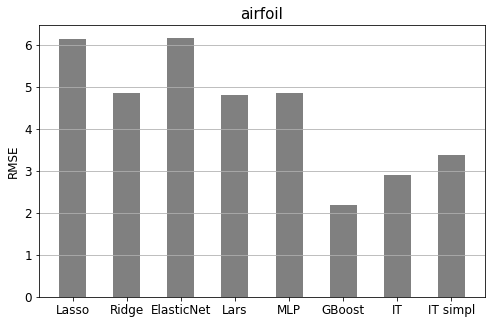

In [24]:
barras('airfoil')